# Descaracterização de Datasets - Dados numéricos e categóricos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

DEFAULT_RANDOM_STATE = 42

In [2]:
# leitura do dataset titanic
dft = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# eliminando qualquer registro com dados faltantes
dft = dft.dropna().reset_index(drop=True)

# eliminando colunas desnecessárias para o exemplo
dft = dft.drop(columns=['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Parch', 'Fare'])

# alterar Pclass para exemplificar uma variavel categórica ordinal
def pclass(v):
  if v == 1:
    return 'primeira'
  elif v == 2:
    return 'segunda'
  else:
    return 'terceira'
dft['Pclass'] = dft['Pclass'].apply(pclass)

dft.head()

,Survived,Pclass,Sex,Age
0,1,primeira,female,38.0
1,1,primeira,female,35.0
2,0,primeira,male,54.0
3,1,terceira,female,4.0
4,1,primeira,female,58.0


## Variáveis Categóricas

### Não ordinais

In [3]:
dft1 = pd.concat([dft, pd.get_dummies(dft['Sex'])], axis=1).drop(columns='Sex') #onhot encoding
dft1.head()

,Survived,Pclass,Age,female,male
0,1,primeira,38.0,1,0
1,1,primeira,35.0,1,0
2,0,primeira,54.0,0,1
3,1,terceira,4.0,1,0
4,1,primeira,58.0,1,0


### Ordinais

In [4]:
le_Pclass = LabelEncoder()
dft1['Pclass'] = le_Pclass.fit_transform(dft1['Pclass'])
dft1.head()

,Survived,Pclass,Age,female,male
0,1,0,38.0,1,0
1,1,0,35.0,1,0
2,0,0,54.0,0,1
3,1,2,4.0,1,0
4,1,0,58.0,1,0


In [5]:
le_Pclass.inverse_transform(dft1['Pclass'].iloc[:10])

array(['primeira', 'primeira', 'primeira', 'terceira', 'primeira',
       'segunda', 'primeira', 'primeira', 'primeira', 'primeira'],
      dtype=object)

## Divisão Treino e Teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dft1.drop(columns='Survived'), dft1['Survived'], test_size=.2, random_state=DEFAULT_RANDOM_STATE, stratify=dft1['Survived'])

X_train.head()

,Pclass,Age,female,male
156,0,70.00,0,1
132,0,48.00,0,1
8,0,49.00,1,0
55,0,0.92,0,1
122,0,52.00,1,0


## Variáveis Numéricas

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train[['Age']])

X_train[['Age']] = scaler.transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])

X_train.sample(5)

,Pclass,Age,female,male
174,0,0.190693,1,0
23,0,0.456247,0,1
16,0,0.279211,0,1
72,1,0.291856,1,0
147,0,0.595346,0,1


In [8]:
X_test.sample(5)

,Pclass,Age,female,male
154,0,0.443601,0,1
111,0,0.620637,0,1
164,0,0.203338,1,0
27,0,0.759737,0,1
60,0,0.380374,1,0


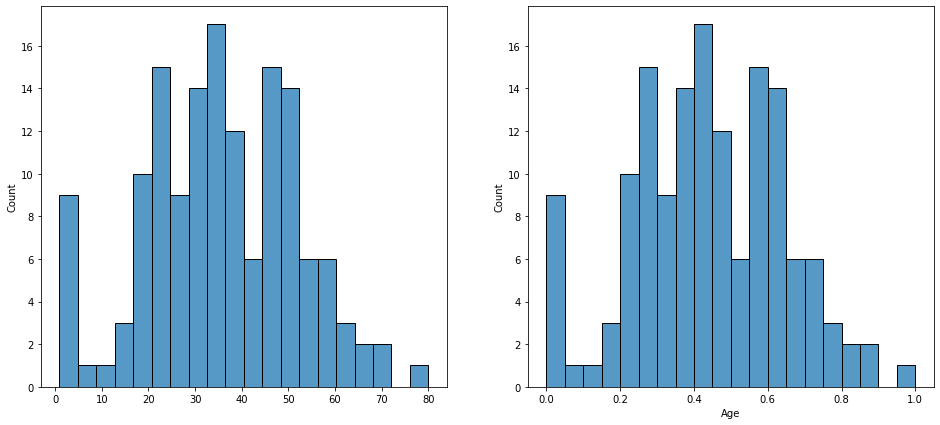

In [9]:
# Apesar da mudança de escala é possível perceber que a distribuição dos dados é preservada

fig, ax = plt.subplots(1,2, figsize=(16, 7))

x = scaler.inverse_transform(X_train[['Age']])[:, 0]
sns.histplot(x, ax=ax[0], bins=20)

x = X_train['Age']
sns.histplot(x, ax=ax[1], bins=20)

plt.show()

## Montagem dos datasets para disponibilização

In [10]:
X_train.columns = [f'F{i+1}' for i in range(X_train.shape[1])]
X_train_final = pd.concat([X_train, y_train.rename('LABEL')], axis=1)
X_train_final.head()

,F1,F2,F3,F4,LABEL
156,0,0.873546,0,1,0
132,0,0.595346,0,1,1
8,0,0.607992,1,0,1
55,0,0.000000,0,1,1
122,0,0.645928,1,0,1


In [11]:
X_test.columns = [f'F{i+1}' for i in range(X_test.shape[1])]
X_test_final = pd.concat([X_test, y_test.rename('LABEL')], axis=1)
X_test_final.head()

,F1,F2,F3,F4,LABEL
1,0,0.430956,1,0,1
21,0,0.671219,0,1,0
154,0,0.443601,0,1,0
170,0,0.405665,1,0,1
67,0,0.355083,0,1,0


# Descaracterização de Datasets - Dados Textuais

In [12]:
df_fakebr = pd.read_csv('https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv')
df_fakebr = df_fakebr.drop(columns='index')
df_fakebr.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [13]:
X_train_txt, X_test_txt, y_train_txt, y_test_txt = train_test_split(df_fakebr.drop(columns='label'), df_fakebr['label'], test_size=.2, random_state=DEFAULT_RANDOM_STATE, stratify=df_fakebr['label'])

In [14]:
tfidf = TfidfVectorizer(min_df=5, max_df=.7, max_features=100)
tfidf.fit(X_train_txt['preprocessed_news'])

# retorna matrizes esparsas
X_train_txt_tfidf = tfidf.transform(X_train_txt['preprocessed_news'])
X_test_txt_tfidf = tfidf.transform(X_test_txt['preprocessed_news'])

In [15]:
# transforma novamente em dataframe com nomes das palavras
df_train_txt_tfidf = pd.DataFrame(X_train_txt_tfidf.todense(), columns=list(tfidf.get_feature_names_out()))
df_test_txt_tfidf = pd.DataFrame(X_test_txt_tfidf.todense(), columns=list(tfidf.get_feature_names_out()))

df_train_txt_tfidf.head()

,acordo,afirmou,agora,ainda,alem,ano,anos,antes,apenas,apos,...,tambem,temer,ter,todos,tres,tribunal,tudo,vai,vez,voce
0,0.176422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497775,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.129980,0.084008,0.160014,0.350386,0.000000,0.000000,0.073855,...,0.114866,0.000000,0.000000,0.000000,0.092404,0.000000,0.000000,0.234937,0.000000,0.099225
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.281328,0.000000,0.000000,0.136797,0.000000,0.000000,0.153245,0.255735,0.000000,0.000000
3,0.123128,0.000000,0.070149,0.101902,0.065861,0.000000,0.164818,0.070294,0.070606,0.057901,...,0.000000,0.221301,0.055309,0.131366,0.000000,0.073978,0.073581,0.000000,0.069136,0.077790
4,0.000000,0.026338,0.000000,0.021127,0.000000,0.000000,0.022781,0.058295,0.000000,0.000000,...,0.018670,0.000000,0.022934,0.000000,0.060078,0.000000,0.000000,0.025458,0.000000,0.000000


## Montagem dos datasets para disponibilização

In [16]:
df_train_txt_tfidf.columns = [f'F{i+1}' for i in range(df_train_txt_tfidf.shape[1])]
df_train_txt_tfidf = pd.concat([df_train_txt_tfidf, y_train.rename('LABEL').reset_index(drop=True)], axis=1)
print(df_train_txt_tfidf.shape)
df_train_txt_tfidf.head()

(5760, 101)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F92,F93,F94,F95,F96,F97,F98,F99,F100,LABEL
0,0.176422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497775,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.129980,0.084008,0.160014,0.350386,0.000000,0.000000,0.073855,...,0.000000,0.000000,0.000000,0.092404,0.000000,0.000000,0.234937,0.000000,0.099225,1.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.136797,0.000000,0.000000,0.153245,0.255735,0.000000,0.000000,1.0
3,0.123128,0.000000,0.070149,0.101902,0.065861,0.000000,0.164818,0.070294,0.070606,0.057901,...,0.221301,0.055309,0.131366,0.000000,0.073978,0.073581,0.000000,0.069136,0.077790,1.0
4,0.000000,0.026338,0.000000,0.021127,0.000000,0.000000,0.022781,0.058295,0.000000,0.000000,...,0.000000,0.022934,0.000000,0.060078,0.000000,0.000000,0.025458,0.000000,0.000000,1.0


In [17]:
df_test_txt_tfidf.columns = [f'F{i+1}' for i in range(df_test_txt_tfidf.shape[1])]
df_test_txt_tfidf = pd.concat([df_test_txt_tfidf, y_test.rename('LABEL').reset_index(drop=True)], axis=1)
print(df_test_txt_tfidf.shape)
df_test_txt_tfidf.head()

(1440, 101)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F92,F93,F94,F95,F96,F97,F98,F99,F100,LABEL
0,0.081634,0.084225,0.000000,0.000000,0.0,0.0,0.000000,0.466047,0.0,0.000000,...,0.000000,0.073340,0.087096,0.0,0.0,0.0,0.081411,0.000000,0.000000,1.0
1,0.185688,0.000000,0.000000,0.153677,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.222493,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.206878,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.652643,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.209191,0.000000,0.000000,0.0,0.0,0.090469,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.101100,0.113846,0.256195,1.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.277979,...,0.000000,0.265535,0.000000,0.0,0.0,0.0,0.589513,0.000000,0.000000,0.0


# Exemplo Real

In [18]:
df = pd.read_parquet('https://github.com/fernandosola/eniac2021-article/raw/main/datasets/df_train_de.parquet')
df.head()

,F000,F001,F002,F003,F004,F005,F006,F007,F008,F009,...,F118,F119,F120,F121,F122,F123,F124,F125,F126,LABEL
3389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.15,0.593243,0.0,0.593243,0
3401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00,0.014189,0.0,0.014189,0
3275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.35,0.088514,0.0,0.088514,1
2969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052632,0.0,0.0,0.166667,0.0,0.15,0.209459,0.0,0.209459,0
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00,0.136486,0.0,0.136486,0


In [19]:
df = pd.read_parquet('https://github.com/fernandosola/eniac2021-article/raw/main/datasets/df_train_txt.parquet')
df.head()

,0000,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,LABEL
3389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0
3401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0
3275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,1
2969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.06589,0.0,0.0,0.0,0
